https://pstblog.com/2016/10/04/stacked-charts

In [1]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
matplotlib.style.use('ggplot')

In [5]:
data = [[2000, 2000, 2000, 2001, 2001, 2001, 2002, 2002, 2002],
        ['Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar'],
        [1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [6]:
data

[[2000, 2000, 2000, 2001, 2001, 2001, 2002, 2002, 2002],
 ['Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar'],
 [1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [7]:
rows = zip(data[0], data[1], data[2])
headers = ['Year', 'Month', 'Value']
df = pd.DataFrame(rows, columns=headers)

In [8]:
df

,Year,Month,Value
0,2000,Jan,1
1,2000,Feb,2
2,2000,Mar,3
3,2001,Jan,4
4,2001,Feb,5
5,2001,Mar,6
6,2002,Jan,7
7,2002,Feb,8
8,2002,Mar,9


### Iterative Solution

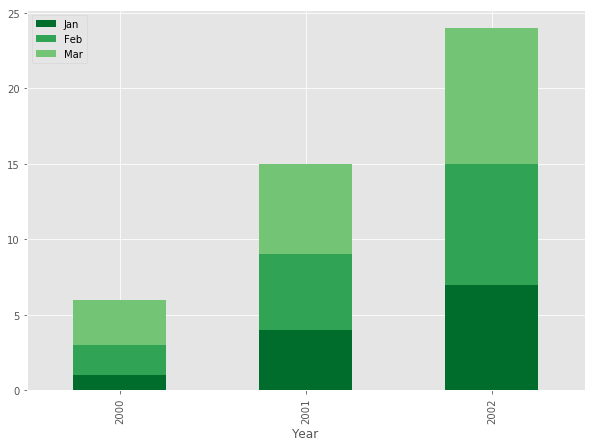

In [9]:
fig, ax = plt.subplots(figsize=(10,7))  

months = df['Month'].drop_duplicates()
margin_bottom = np.zeros(len(df['Year'].drop_duplicates()))
colors = ["#006D2C", "#31A354","#74C476"]

for num, month in enumerate(months):
    values = list(df[df['Month'] == month].loc[:, 'Value'])

    df[df['Month'] == month].plot.bar(x='Year',y='Value', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values

plt.show()

### Using a Pivot

In [13]:
df

,Year,Month,Value
0,2000,Jan,1
1,2000,Feb,2
2,2000,Mar,3
3,2001,Jan,4
4,2001,Feb,5
5,2001,Mar,6
6,2002,Jan,7
7,2002,Feb,8
8,2002,Mar,9


In [10]:
pivot_df = df.pivot(index='Year', columns='Month', values='Value')

In [11]:
pivot_df

Month,Feb,Jan,Mar
Year,,,
2000,2,1,3
2001,5,4,6
2002,8,7,9


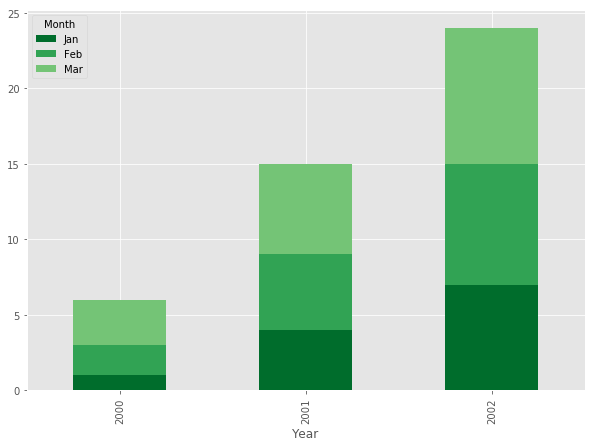

In [12]:
#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
pivot_df.loc[:,['Jan','Feb', 'Mar']].plot.bar(stacked=True, color=colors, figsize=(10,7))